# Máquina de Turing

Ejemplifica la creación de un autómata de una máquina da Turing

In [1]:
import os
import sys

In [2]:
from maquinas.recursivelyenumerable.tm import TuringMachine as TM
from maquinas.simulation import Simulation

In [3]:
# Creating automata finito
aⁿbⁿ=TM(Q=['q_0','q_1','q_2','q_3','q_4'],
         sigma=['a','b'],
         gamma=['X','Y'],
         q_0='q_0',
         A=['q_4'],
         delta=[
            (('q_0','a'),[('q_1','X','R')]),
            (('q_0','Y'),[('q_3','Y','R')]),
            (('q_1','a'),[('q_1','a','R')]),
            (('q_1','b'),[('q_2','Y','L')]),
            (('q_1','Y'),[('q_1','Y','R')]),
            (('q_2','a'),[('q_2','a','L')]),
            (('q_2','Y'),[('q_2','Y','L')]),
            (('q_2','X'),[('q_0','X','R')]),
            (('q_3','Y'),[('q_3','Y','R')]),
            (('q_3','[B]'),[('q_4','[B]','R')]),
         ]
    )

In [4]:
aⁿbⁿ.ttable

{0: {3: {(1, 1, 1)}, 2: {(3, 2, 1)}},
 1: {3: {(1, 3, 1)}, 4: {(2, 2, -1)}, 2: {(1, 2, 1)}},
 2: {3: {(2, 3, -1)}, 2: {(2, 2, -1)}, 1: {(0, 1, 1)}},
 3: {2: {(3, 2, 1)}, 0: {(4, 0, 1)}}}

In [5]:
print(aⁿbⁿ.Q)
print(aⁿbⁿ.gamma)

OrderedSet(['q_0', 'q_1', 'q_2', 'q_3', 'q_4'])
OrderedSet(['𝖁', 'X', 'Y', 'a', 'b'])


In [6]:
print(aⁿbⁿ.summary())

States  : q_0, q_1, q_2, q_3, q_4
Sigma   : a, b
Gamma   : 𝖁, X, Y, a, b
Initial : q_0
Aceptors: q_4
Transitions:
 q_0,a/X → q_1,1
 q_0,Y/Y → q_3,1
 q_1,a/a → q_1,1
 q_1,b/Y → q_2,-1
 q_1,Y/Y → q_1,1
 q_2,a/a → q_2,-1
 q_2,Y/Y → q_2,-1
 q_2,X/X → q_0,1
 q_3,Y/Y → q_3,1
 q_3,𝖁/𝖁 → q_4,1


In [7]:
for states in aⁿbⁿ.delta_stepwise("aaabbb"):
    if states:
        print(f"{aⁿbⁿ.states2string(states)} ⇒",end="\n")
        res=states
    else:
        print("Halts")
    
print(f"Se acepta?", "Sí" if aⁿbⁿ.accept(res) else "No" )

q_0, …  _a_ aabbb … ⇒
q_1, … X _a_ abbb … ⇒
q_1, … Xa _a_ bbb … ⇒
q_1, … Xaa _b_ bb … ⇒
q_2, … Xa _a_ Ybb … ⇒
q_2, … X _a_ aYbb … ⇒
q_2, …  _X_ aaYbb … ⇒
q_0, … X _a_ aYbb … ⇒
q_1, … XX _a_ Ybb … ⇒
q_1, … XXa _Y_ bb … ⇒
q_1, … XXaY _b_ b … ⇒
q_2, … XXa _Y_ Yb … ⇒
q_2, … XX _a_ YYb … ⇒
q_2, … X _X_ aYYb … ⇒
q_0, … XX _a_ YYb … ⇒
q_1, … XXX _Y_ Yb … ⇒
q_1, … XXXY _Y_ b … ⇒
q_1, … XXXYY _b_  … ⇒
q_2, … XXXY _Y_ Y … ⇒
q_2, … XXX _Y_ YY … ⇒
q_2, … XX _X_ YYY … ⇒
q_0, … XXX _Y_ YY … ⇒
q_3, … XXXY _Y_ Y … ⇒
q_3, … XXXYY _Y_  … ⇒
q_3, … XXXYYY _𝖁_  … ⇒
q_4, … XXXYYY𝖁 _𝖁_  … ⇒


AttributeError: 'TuringMachine' object has no attribute 'accept'

In [12]:
res=aⁿbⁿ.delta_extended(None,"aaabbb")
print(f"Se acepta?", "Sí" if aⁿbⁿ.accepts(res) else "No" )

Se acepta? No


In [11]:
res=aⁿbⁿ.delta_extended(None,"aabbb")
print(f"Se acepta?", "Sí" if aⁿbⁿ.accepts(res) else "No" )

Se acepta? No


In [13]:
s=Simulation(aⁿbⁿ,"aaaabbb")
s.run()

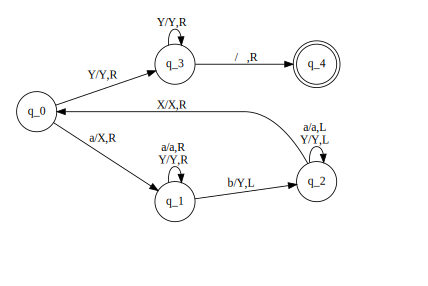

In [14]:
aⁿbⁿ.graph()

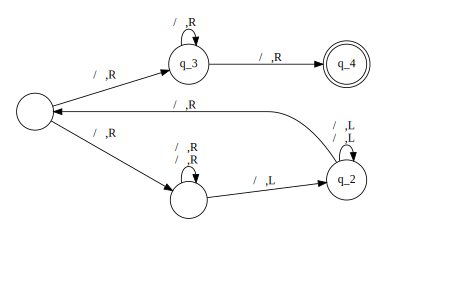

In [15]:
aⁿbⁿ.graph(symbols={'Y':'🌵','X':'🦕','a':'🦑','b':'🦄'},states={'q_0':'🤣','q_1':'🤗'})

In [16]:
s=Simulation(aⁿbⁿ,'aaabbb')
s.run()

In [17]:
aⁿbⁿ.table()

,X,Y,a,b,𝖁
⟶q_0,∅,"/Y→q_3,R","/X→q_1,R",∅,∅
q_1,∅,"/Y→q_1,R","/a→q_1,R","/Y→q_2,L",∅
q_2,"/X→q_0,R","/Y→q_2,L","/a→q_2,L",∅,∅
q_3,∅,"/Y→q_3,R",∅,∅,"/𝖁→q_4,R"
q_4,∅,∅,∅,∅,∅


In [18]:
aⁿbⁿ.save_gif('aaabbb')

TypeError: list indices must be integers or slices, not str